In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'supp_figure_6',
        root = '..'
    )

In [2]:
import patchworklib as pw
import seaborn as sns 
import matplotlib.pyplot as plt

<Figure size 72x72 with 0 Axes>

In [3]:
axs = list()

for i, tss_fig in enumerate(snakemake.input['tss']):
    ax_tss = pw.Brick(f'ax_{i}_tss', figsize=(5, 5))
    ax_tss.imshow(plt.imread(tss_fig))
    ax_tss.axis('off')
    axs.append(ax_tss)

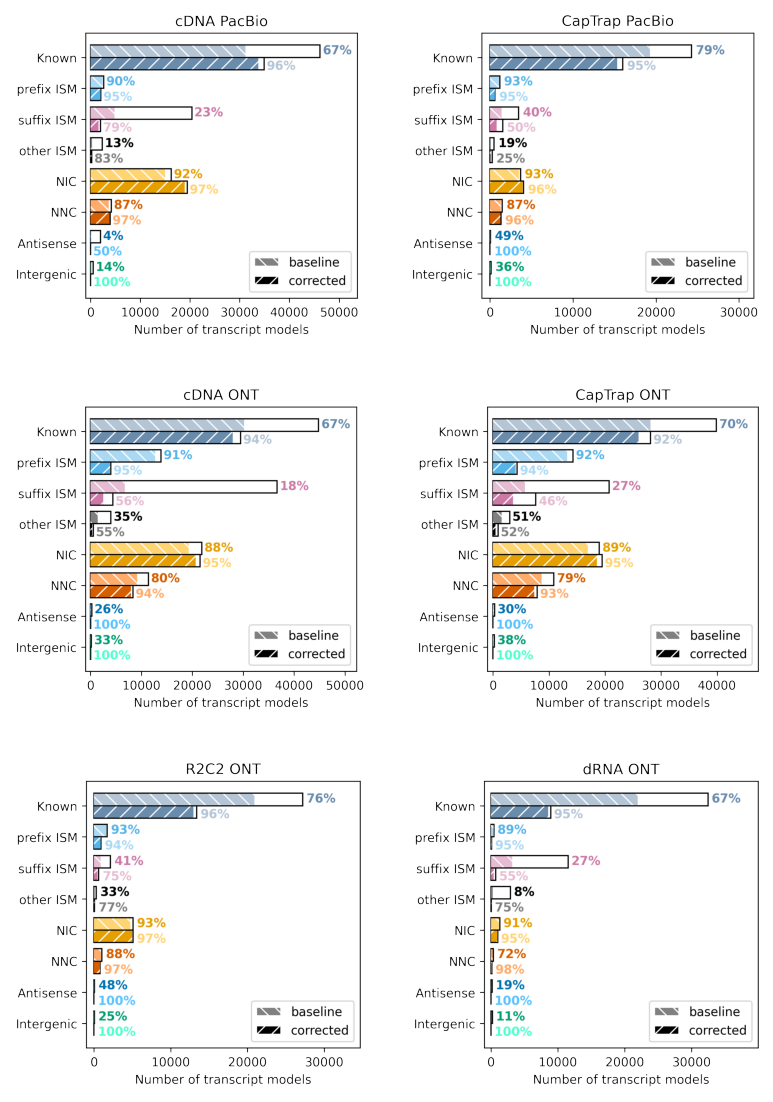

In [4]:
ax = (axs[0] | axs[1]) / (axs[2] | axs[3]) / (axs[4] | axs[5])
ax.savefig(snakemake.output['fig_tss'])

In [5]:
axs = list()

for i, tes_fig in enumerate(snakemake.input['tes']):
    ax_tes = pw.Brick(f'ax_{i}_tes', figsize=(5, 5))
    ax_tes.imshow(plt.imread(tes_fig))
    ax_tes.axis('off')
    axs.append(ax_tes)

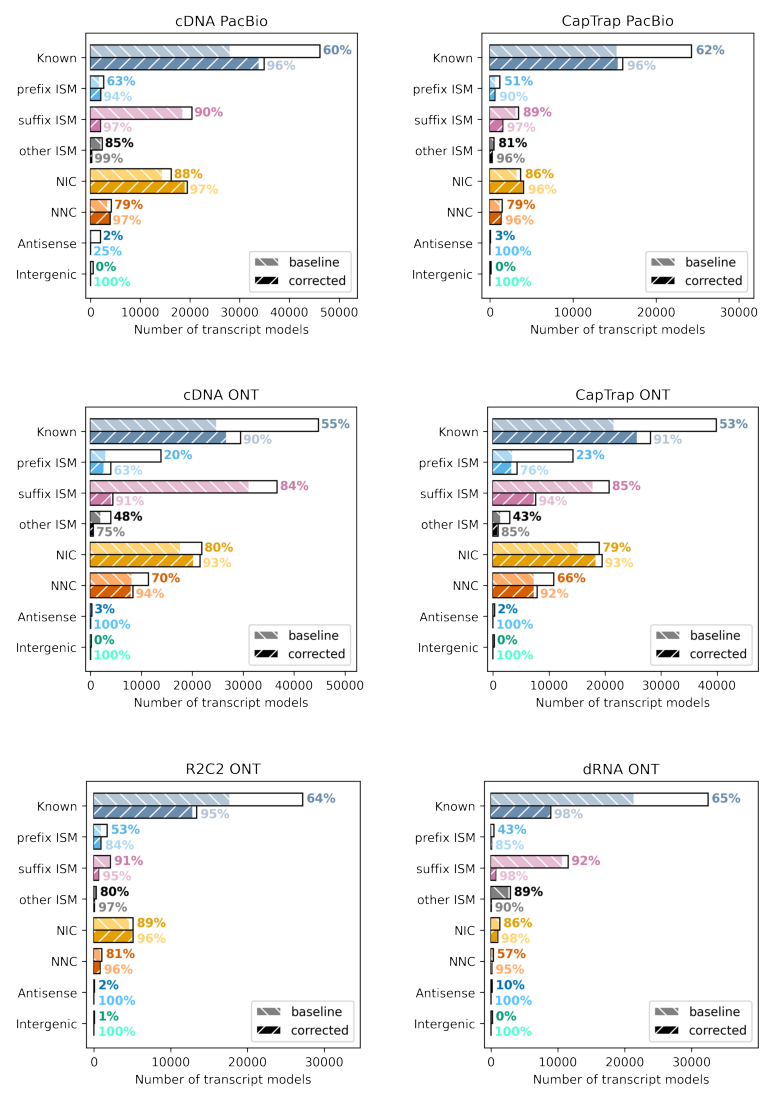

In [6]:
ax = (axs[0] | axs[1]) / (axs[2] | axs[3]) / (axs[4] | axs[5])
ax.savefig(snakemake.output['fig_tes'])